## Imports 

In [2]:
import pandas as pd
import os
from tqdm import tqdm
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from Constants import DATASET_DIRECTORY
from Constants import X_columns, y_columns
from Constants import dict_7classes, dict_2classes

## Import Dataset

In [3]:
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_set = df_sets[0]
data = pd.read_csv(DATASET_DIRECTORY + training_set)

## Pre-process

In [4]:
new_y = [dict_7classes[k] for k in data[y_columns[0]]]
data[y_columns[1]] = new_y
new_y = [dict_2classes[k] for k in data[y_columns[0]]]
data[y_columns[2]] = new_y


### Label Encoding

In [5]:
le : list[LabelEncoder] = []

for column in y_columns:
    le1 = LabelEncoder()
    data[column] = le1.fit_transform(data[column])
    le.append(le1)

### Scale

In [6]:
scaler = MinMaxScaler()
data[X_columns] = scaler.fit_transform(data[X_columns])

## Train Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data[X_columns], data[y_columns], test_size=0.2, random_state=42)

## Classification Models

### Load Features

In [8]:
with open('store/rfe_features3-39.pkl', 'rb') as file:
    feature_sets = pickle.load(file)

feature_sets

{'multi34': [{'Method': 'RFE', 'features': ['Min', 'IAT', 'Magnitue']},
  {'Method': 'RFE', 'features': ['syn_count', 'Min', 'IAT', 'Magnitue']},
  {'Method': 'RFE',
   'features': ['syn_count', 'AVG', 'Tot size', 'IAT', 'Magnitue']},
  {'Method': 'RFE',
   'features': ['fin_flag_number',
    'syn_count',
    'Min',
    'Tot size',
    'IAT',
    'Magnitue']},
  {'Method': 'RFE',
   'features': ['fin_flag_number',
    'psh_flag_number',
    'Min',
    'AVG',
    'Tot size',
    'IAT',
    'Magnitue']},
  {'Method': 'RFE',
   'features': ['Protocol Type',
    'fin_flag_number',
    'psh_flag_number',
    'Min',
    'AVG',
    'Tot size',
    'IAT',
    'Magnitue']},
  {'Method': 'RFE',
   'features': ['Protocol Type',
    'fin_flag_number',
    'psh_flag_number',
    'syn_count',
    'Min',
    'AVG',
    'Tot size',
    'IAT',
    'Magnitue']},
  {'Method': 'RFE',
   'features': ['Protocol Type',
    'psh_flag_number',
    'ack_count',
    'syn_count',
    'Tot sum',
    'Min',
    'AV

In [9]:
feature_sets = feature_sets['multi34']
y_train = y_train[y_columns[0]]
y_test = y_test[y_columns[0]]

In [10]:
models : list[RandomForestClassifier] = [
    RandomForestClassifier(random_state=42),
    # DecisionTreeClassifier(),
    # KNeighborsClassifier(n_neighbors=7),
]

In [11]:
results = []
trained_models = []

In [15]:
for set in feature_sets[2:3]:
    feature_set = set['features']
    feature_selection_method = set['Method']
    for model in models:
        model.fit(x_train[feature_set], y_train)
        y_pred = model.predict(x_test[feature_set])
        trained_models.append((feature_selection_method, feature_set, model, y_pred))


In [16]:
for feature_selection_method, feature_set, model, y_pred in tqdm(trained_models):
    accuracyScore = accuracy_score(y_pred, y_test)
    recallScore = recall_score(y_pred, y_test, average='macro')
    precisionScore = precision_score(y_pred, y_test, average='macro')
    f1Score = f1_score(y_pred, y_test, average='macro')
    results.append({
        'model' : model.__class__.__name__,
        'feature selection' : feature_selection_method,
        'features' : feature_set,
        'number of features' : len(feature_set),
        'accuracy_score' : accuracyScore,
        'recall_score' : recallScore,
        'precision_score' : precisionScore,
        'f1_score' : f1Score,
    })

100%|██████████| 29/29 [00:01<00:00, 15.85it/s]


In [17]:
from sklearn.metrics import classification_report
# recall = recall_score(y_test, trained_models[0][3], average=None)
# # report = classification_report(y_test, trained_models[0][3])
# accuracy = accuracy_score
class_report = classification_report(y_test, trained_models[0][3], output_dict=True)

In [18]:
class_report

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0},
 '1': {'precision': 0.8043654001616815,
  'recall': 0.8899821109123435,
  'f1-score': 0.8450106157112527,
  'support': 1118.0},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0},
 '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0},
 '4': {'precision': 0.9935483870967742,
  'recall': 0.9903536977491961,
  'f1-score': 0.9919484702093397,
  'support': 311.0},
 '5': {'precision': 0.925,
  'recall': 0.9736842105263158,
  'f1-score': 0.9487179487179489,
  'support': 38.0},
 '6': {'precision': 1.0,
  'recall': 0.999599679743795,
  'f1-score': 0.9997997997997998,
  'support': 7494.0},
 '7': {'precision': 0.9898785425101214,
  'recall': 0.9898785425101214,
  'f1-score': 0.9898785425101214,
  'support': 494.0},
 '8': {'precision': 0.9990414569853823,
  'recall': 0.998562874251497,
  'f1-score': 0.9988021082894107,
  'support': 4175.0},
 '9': {'precision': 0.9992632612966601,
  'r

In [19]:
del class_report['accuracy']
del class_report['macro avg']
del class_report['weighted avg']



In [35]:
dfs = pd.DataFrame(class_report).T
dfs[['precision', 'recall', 'f1-score', 'support']] = dfs[['precision', 'recall', 'f1-score', 'support']] * 100
dfs[['precision', 'recall', 'f1-score', 'support']] = dfs[['precision', 'recall', 'f1-score', 'support']].round(2)
dfs['support'] = dfs['support']
dfs

,precision,recall,f1-score,support
0,0.00,0.00,0.00,100.0
1,80.44,89.00,84.50,111800.0
2,0.00,0.00,0.00,300.0
3,0.00,0.00,0.00,500.0
4,99.35,99.04,99.19,31100.0
5,92.50,97.37,94.87,3800.0
6,100.00,99.96,99.98,749400.0
7,98.99,98.99,98.99,49400.0
8,99.90,99.86,99.88,417500.0
9,99.93,99.93,99.93,407200.0


In [20]:
recallDF = pd.DataFrame(class_report).T

In [27]:
scaler = MinMaxScaler()
recallDF[['support']] = scaler.fit_transform(recallDF[['support']])

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,0.000000
1,0.804365,0.889982,0.845011,0.149072
2,0.000000,0.000000,0.000000,0.000267
3,0.000000,0.000000,0.000000,0.000534
4,0.993548,0.990354,0.991948,0.041372
5,0.925000,0.973684,0.948718,0.004938
6,1.000000,0.999600,0.999800,1.000000
7,0.989879,0.989879,0.989879,0.065795
8,0.999041,0.998563,0.998802,0.557053
9,0.999263,0.999263,0.999263,0.543307


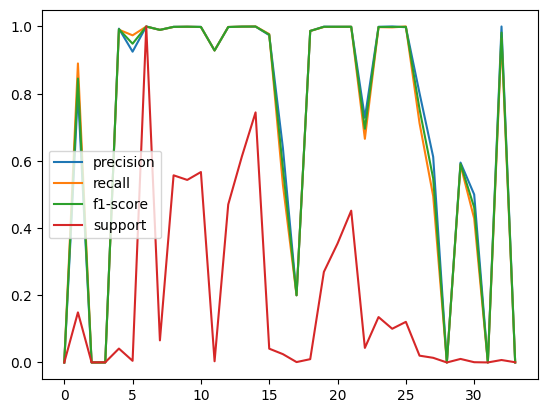

In [22]:
recallDF.plot()
plt.savefig('plots/rfe4+rf.png')
plt.show()

In [31]:
df = pd.DataFrame(results)
df[['accuracy_score', 'recall_score', 'precision_score', 'f1_score']] = df[['accuracy_score', 'recall_score', 'precision_score', 'f1_score']]*100
df[['accuracy_score', 'recall_score', 'precision_score', 'f1_score']] = df[['accuracy_score', 'recall_score', 'precision_score', 'f1_score']].round(2)
df[['number of features', 'accuracy_score', 'recall_score', 'precision_score', 'f1_score']].head(10)

,number of features,accuracy_score,recall_score,precision_score,f1_score
0,3,98.87,72.55,71.49,71.96
1,4,99.05,82.22,75.86,77.27
2,5,99.01,85.65,74.67,77.22
3,6,99.07,82.30,72.50,74.47
4,7,98.94,75.03,69.39,70.81
5,8,99.00,71.44,68.67,69.66
6,9,99.15,74.29,71.71,72.60
7,10,99.12,77.75,70.75,71.93
8,11,99.14,77.05,71.18,72.55
9,12,99.13,74.00,70.40,71.50


In [31]:
df.to_csv('store/result3-39_multi34.csv')